In [108]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Q1.1

In [109]:
import os
from scipy.ndimage import gaussian_filter
from skimage import io, transform
from skimage.exposure import equalize_hist
import numpy as np
class ImageLoader:
    def __init__(self):
        self.image_dict = {}
        self.pyramids = {}
    def load_images(self, base_directory, target_size=(128, 128)):
        subdirectories = [subdir for subdir in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, subdir))]

        for subdirectory in subdirectories:
            directory = os.path.join(base_directory, subdirectory)
            filenames = os.listdir(directory)
            images = []
            for filename in filenames:
                if filename.endswith('.png'):
                    img_path = os.path.join(directory, filename)
                    img = io.imread(img_path)

                    # Resize the image to the target size
                    img_resized = transform.resize(img, target_size, mode='reflect', anti_aliasing=True)
                    images.append(img_resized)
            self.image_dict[subdirectory] = np.array(images)
base_directory = '/content/drive/MyDrive/cv/cv_ass_2/textures/training'
image_loader = ImageLoader()
image_loader.load_images(base_directory)

Q1.2

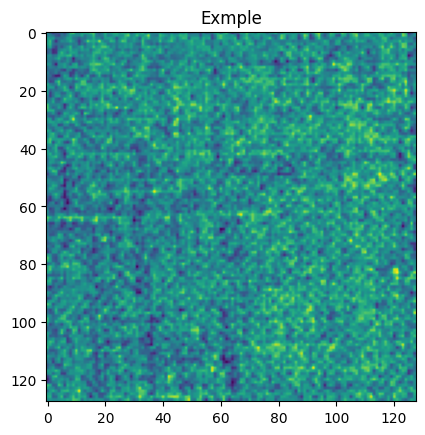

In [110]:
import matplotlib.pyplot as plt
class VisualizationHelper:
    def __init__(self):
        self.pyramid_sizes = [(576, 576), (228, 228), (144, 144)]
    def show_pyramid(self,pyramid,original_image):
        import matplotlib.pyplot as plt
        labels = ['Level 1', 'Level 2', 'Level 3']
        fig, axs = plt.subplots(1, 4, figsize=(15, 5))
        # Plot the original image
        axs[0].imshow(original_image, cmap='gray')
        axs[0].set_title('Original Image')
        axs[0].axis('off')
        axs[0].text(0.5, -0.15, f'Size: {self.pyramid_sizes[0]}', ha='center', transform=axs[0].transAxes)
        for i in range(3):
           axs[i+1].imshow(pyramid[i], cmap='gray')
           axs[i+1].set_title(labels[i])
           axs[i+1].axis('off')
           axs[i+1].text(0.5, -0.15, f'Size: {self.pyramid_sizes[i]}', ha='center', transform=axs[i+1].transAxes)
        plt.show()
    def visualize_histogram(self,hist):
      # Plot the histogram
      plt.figure(figsize=(10, 5))
      plt.plot(hist, lw=2, color='black')
      plt.xlabel('Pixel Intensity')
      plt.ylabel('Count')
      plt.title('Histogram of Filtered Image')
      plt.grid(True)
      plt.show()
    def visualize_hist_pyramid(self,histogram_list):
      bin_size = 256
      hist_labels = ['Level 1', 'Level 2', 'Level 3']
      plt.figure(figsize=(10, 5))
      plt.plot(histogram_list[0], lw=2, color='red', label=hist_labels[0])
      plt.plot(histogram_list[1], lw=2, color='green', label=hist_labels[1])
      plt.plot(histogram_list[2], lw=2, color='blue', label=hist_labels[2])
      plt.xlabel('Pixel Intensity')
      plt.ylabel('Count')
      plt.title('Histograms of Image example')
      plt.legend()
      plt.grid(True)
      plt.show()
    def display_image(self, img):
                plt.imshow(img)
                plt.title('Exmple')
                plt.show()

visualization_helper = VisualizationHelper()
img = image_loader.image_dict['canvas1'][11]#EXAMPLE
visualization_helper.display_image(img)

In [111]:
from skimage import io, color, exposure
from skimage.filters import gaussian
from skimage.filters import sobel
class ImageProcessor:
    def __init__(self):
        self.pyramid_sizes = [(576, 576), (228, 228), (144, 144)]
    def img_histogram_equalization(self, img):

        equalized_image = exposure.equalize_hist(img)
        return equalized_image
    def img_gaussian_smoothing(self, equalized_image):
        sigma = 1.0  # Adjust this value based on the amount of smoothing desired
        smoothed_image = gaussian(equalized_image, sigma=sigma)
        return smoothed_image
    def img_pyramid(self, smoothed_image):
      image_pyramid = []
      for size in self.pyramid_sizes:
          resized_image = transform.resize(smoothed_image, size, anti_aliasing=True)
          image_pyramid.append(resized_image)
      return image_pyramid
    def img_sobel(self,sized_img):
      edges = sobel(sized_img)
      return edges
    def img_histogram(self,img_edges):
      hist, bin_centers = exposure.histogram(img_edges, nbins=256)
      hist = hist/hist.max()
      return hist
#create instance for the project
image_processor =  ImageProcessor()

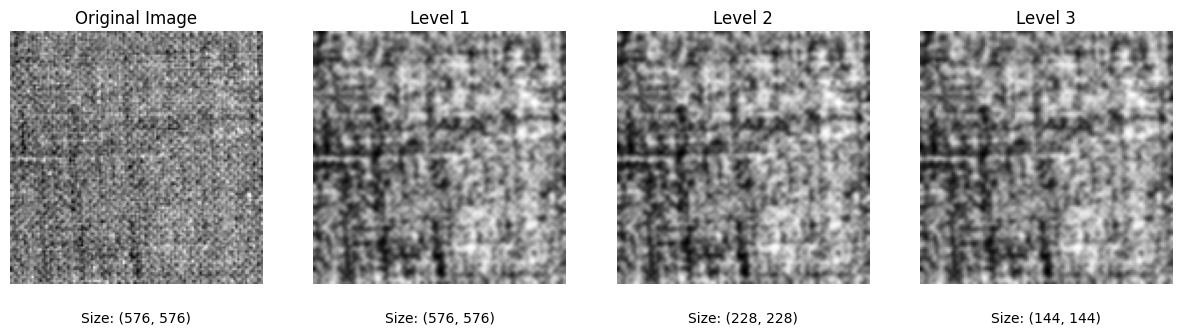

In [112]:
example_pyramid = image_processor.img_histogram_equalization(img)
example_pyramid = image_processor.img_gaussian_smoothing(example_pyramid)
example_pyramid = image_processor.img_pyramid(example_pyramid)
visualization_helper.show_pyramid(example_pyramid,img)

Q1.3


In [113]:
pyramid_dict = image_loader.image_dict.copy()
hist_pyramid_dict = image_loader.image_dict.copy()

In [114]:
pyramid_dict.keys()

dict_keys(['linsseeds1', 'canvas1', 'sand1', 'cushion1', 'stone1', 'seat2'])

In [115]:
from skimage.filters import sobel

list_oflvl1_hists = []
for label in pyramid_dict.keys():
 list_of_label = []
 for img in pyramid_dict[label]:
    equalized = image_processor.img_histogram_equalization(img)
    smoothed = image_processor.img_gaussian_smoothing(equalized)
    pyramid = image_processor.img_pyramid(smoothed)
    listOfHists = []
    for i in pyramid:
      img_sobel = image_processor.img_sobel(i)
      hist = image_processor.img_histogram(img_sobel)
      listOfHists.append(hist)
    list_oflvl1_hists.append(listOfHists[0])
    list_of_label.append(listOfHists)
 hist_pyramid_dict[label] = list_of_label

In [126]:
len(list_oflvl1_hists[0])
dict_oflvl1_hists = {}
dict_oflvl1_hists['linsseeds1'] = list_oflvl1_hists[0:30]
dict_oflvl1_hists['canvas1'] = list_oflvl1_hists[30:60]
dict_oflvl1_hists['sand1'] = list_oflvl1_hists[60:90]
dict_oflvl1_hists['cushion1'] = list_oflvl1_hists[90:120]
dict_oflvl1_hists['stone1'] = list_oflvl1_hists[120:150]
dict_oflvl1_hists['seat2'] = list_oflvl1_hists[150:180]

In [ ]:
averages_dictionary = {}

# Iterate through each key in the original dictionary
for key, lists in dict_oflvl1_hists.items():
    # Calculate the average for each list and store it in the averages list
    averages = [sum(item) / len(item) for item in zip(*lists)]

    # Store the averages for the key in the new dictionary
    averages_dictionary[key] = averages


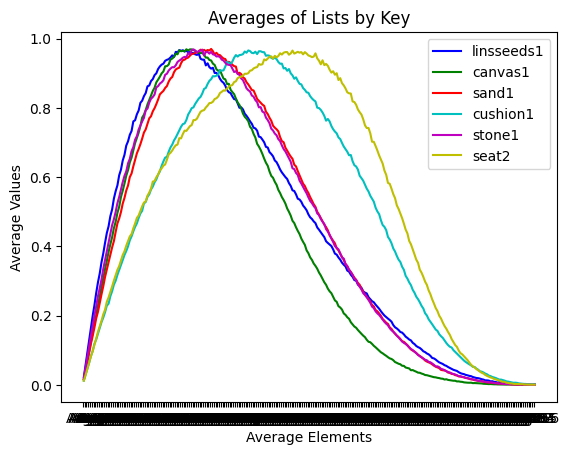

In [130]:
# List of unique colors for each key
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Get the keys and their corresponding averages
keys = list(averages_dictionary.keys())
averages = list(averages_dictionary.values())

# Set up the figure and axis
fig, ax = plt.subplots()

# Create bar plots for each key
# Create continuous line plot for each key
for i in range(len(keys)):
    ax.plot(np.arange(len(averages[i])) + 1, averages[i], label=keys[i], color=colors[i])

# Customize plot
ax.set_xlabel('Average Elements')
ax.set_ylabel('Average Values')
ax.set_title('Averages of Lists by Key')
ax.set_xticks(np.arange(len(averages[0])) + (len(keys) - 1) * 0.1)
ax.set_xticklabels(['Avg{}'.format(idx + 1) for idx in range(len(averages[0]))])

# Add legend
ax.legend()

# Show the plot
plt.show()

In [187]:
base_directory = '/content/drive/MyDrive/cv/cv_ass_2/textures/testing'
test_image_loader = ImageLoader()
test_image_loader.load_images(base_directory)
test_data = test_image_loader.image_dict

In [188]:
test_data_hist = test_data.copy()
for label in test_data.keys():
  test_data_hist[label] = [0]*10
  for i in range(10):
    img = test_data[label][i]
    img = image_processor.img_histogram_equalization(img)
    img = image_processor.img_gaussian_smoothing(img)
    img = image_processor.img_sobel(img)
    hist = image_processor.img_histogram(img)
    test_data_hist[label][i] = hist


In [189]:

def euclidean_distance(hist1, hist2):
    return np.sqrt(np.sum((hist1 - hist2) ** 2))

def classify_image_by_histogram(image_hist, class_histograms):

    # Initialize minimum distance and corresponding class
    min_distance = float('inf')
    classified_class = None

    # Iterate through each class and calculate the distance
    for class_label, class_hist in class_histograms.items():
        distance = euclidean_distance(image_hist, class_hist)

        # Update the minimum distance and class label
        if distance < min_distance:
            min_distance = distance
            classified_class = class_label

    return classified_class


In [204]:
classified_class = classify_image_by_histogram(test_data_hist['stone1'][5], averages_dictionary)
classified_class

'sand1'

here is one of the missclassified samples and its because the sand and the stone histograms are very similar to each other

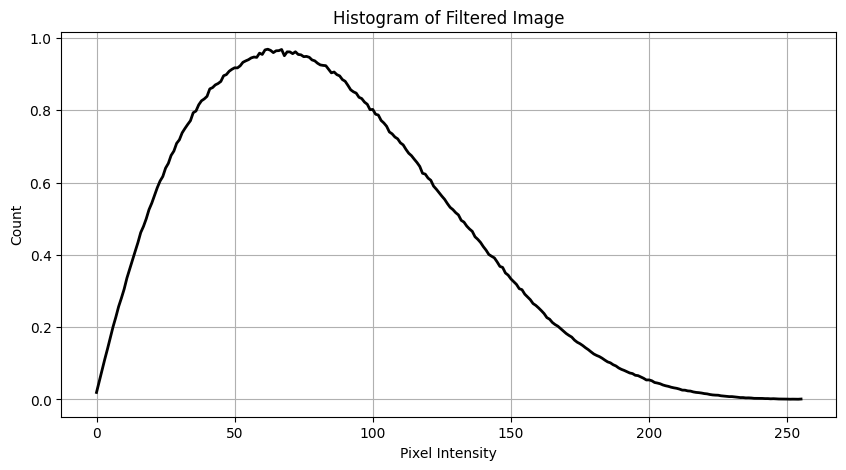

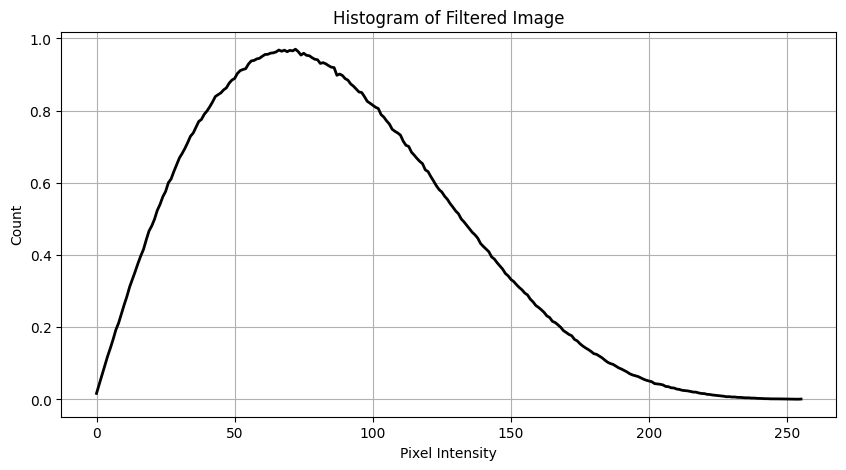

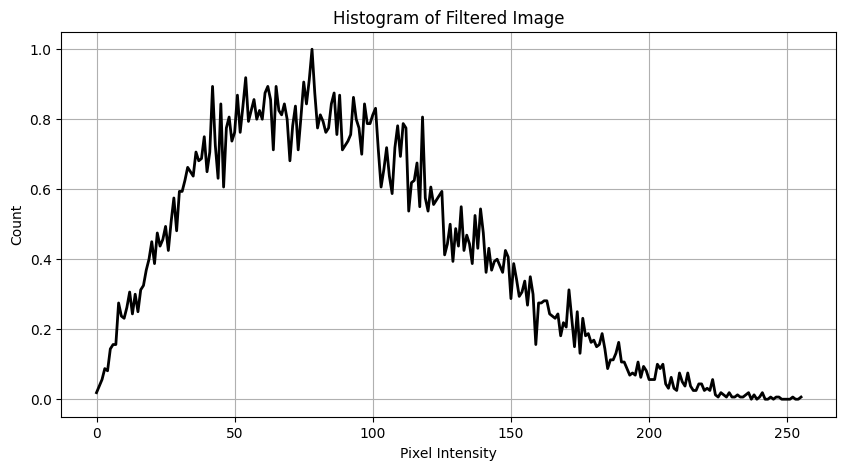

In [207]:
visualization_helper.visualize_histogram(averages_dictionary['stone1'])
visualization_helper.visualize_histogram(averages_dictionary['sand1'])
visualization_helper.visualize_histogram(test_data_hist['stone1'][5])

In [209]:
true_labels = [label for label in test_data_hist for _ in range(10)]

print("True Labels:", true_labels)
print("Total true labels:", len(true_labels))

True Labels: ['canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1', 'seat2', 'seat2', 'seat2', 'seat2', 'seat2', 'seat2', 'seat2', 'seat2', 'seat2', 'seat2', 'cushion1', 'cushion1', 'cushion1', 'cushion1', 'cushion1', 'cushion1', 'cushion1', 'cushion1', 'cushion1', 'cushion1', 'linsseeds1', 'linsseeds1', 'linsseeds1', 'linsseeds1', 'linsseeds1', 'linsseeds1', 'linsseeds1', 'linsseeds1', 'linsseeds1', 'linsseeds1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'stone1', 'stone1', 'stone1', 'stone1', 'stone1', 'stone1', 'stone1', 'stone1', 'stone1', 'stone1']
Total true labels: 60


In [210]:
def generate_predictions(test_data_hist, class_histograms):
    """
    Generate a list of predictions for histograms in the test_data_hist dictionary.

    Parameters:
    test_data_hist (dict): Dictionary containing histograms for each class.
    class_histograms (dict): Dictionary containing histograms for each class (averages).

    Returns:
    list: A list of predicted labels for each histogram in the test_data_hist.
    """
    predictions = []

    for label, histograms in test_data_hist.items():
        for hist in histograms:
            predicted_label = classify_image_by_histogram(hist, class_histograms)
            predictions.append(predicted_label)

    return predictions

# Example usage to generate predictions for all histograms in test_data_hist
# Assuming test_data_hist is the dictionary containing the histograms
# Assuming averages_dictionary is the dictionary containing the average histograms for each class
predicted_labels = generate_predictions(test_data_hist, averages_dictionary)

print("Predictions:", predicted_labels)
print("Total predictions:", len(predicted_labels))  # Should be 60, 10 for each label


Predictions: ['canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1', 'cushion1', 'seat2', 'cushion1', 'cushion1', 'seat2', 'cushion1', 'cushion1', 'cushion1', 'cushion1', 'cushion1', 'cushion1', 'cushion1', 'seat2', 'cushion1', 'cushion1', 'cushion1', 'cushion1', 'cushion1', 'cushion1', 'seat2', 'linsseeds1', 'linsseeds1', 'sand1', 'linsseeds1', 'linsseeds1', 'sand1', 'linsseeds1', 'sand1', 'sand1', 'linsseeds1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1']
Total predictions: 60


In [211]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the functions for distance and classification as before

# Function to calculate evaluation metrics
def calculate_metrics(true_labels, predicted_labels):
    metrics = {}

    metrics['accuracy'] = accuracy_score(true_labels, predicted_labels)
    metrics['precision'] = precision_score(true_labels, predicted_labels, average='weighted')
    metrics['recall'] = recall_score(true_labels, predicted_labels, average='weighted')
    metrics['f1_score'] = f1_score(true_labels, predicted_labels, average='weighted')

    return metrics

metrics = calculate_metrics(true_labels, predicted_labels)


print("Accuracy:", metrics['accuracy'])
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1 Score:", metrics['f1_score'])


Accuracy: 0.6
Precision: 0.5694444444444445
Recall: 0.6
F1 Score: 0.5398890325360914


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Q1.4

In [ ]:
import numpy as np

def reshape_samples(data_dict):

    reshaped_data_dict = {}

    for label, samples in data_dict.items():
        reshaped_samples = []

        for sample in samples:
            # Flatten each histogram and concatenate
            flattened_sample = np.concatenate([hist.flatten() for hist in sample])
            reshaped_samples.append(flattened_sample)

        reshaped_data_dict[label] = reshaped_samples

    return reshaped_data_dict


reshaped_data_dict = reshape_samples(hist_pyramid_dict)

# Print the reshaped data dictionary



In [217]:
len(reshaped_data_dict['canvas1'][0])

768

In [218]:
from sklearn.model_selection import train_test_split

def split_train_validation(data_dict, test_size=0.2, random_state=42):

    train_data_dict = {}  # Dictionary for training data
    validation_data_dict = {}  # Dictionary for validation data

    for label, samples in data_dict.items():
        # Split each label's samples into training and validation sets
        train_samples, validation_samples = train_test_split(samples, test_size=test_size, random_state=random_state)

        train_data_dict[label] = train_samples
        validation_data_dict[label] = validation_samples

    return train_data_dict, validation_data_dict

train_data_dict, validation_data_dict = split_train_validation(reshaped_data_dict)

# Print the shapes of the resulting datasets
for label in train_data_dict:
    print(f"Training data for {label}: {len(train_data_dict[label])} samples")
    print(f"Validation data for {label}: {len(validation_data_dict[label])} samples")


Training data for linsseeds1: 24 samples
Validation data for linsseeds1: 6 samples
Training data for canvas1: 24 samples
Validation data for canvas1: 6 samples
Training data for sand1: 24 samples
Validation data for sand1: 6 samples
Training data for cushion1: 24 samples
Validation data for cushion1: 6 samples
Training data for stone1: 24 samples
Validation data for stone1: 6 samples
Training data for seat2: 24 samples
Validation data for seat2: 6 samples


In [219]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X_train = np.vstack([train_data_dict[label] for label in train_data_dict])
y_train = np.hstack([np.full(len(train_data_dict[label]), label) for label in train_data_dict])

X_val = np.vstack([validation_data_dict[label] for label in validation_data_dict])
y_val = np.hstack([np.full(len(validation_data_dict[label]), label) for label in validation_data_dict])


In [220]:
# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=200, random_state=42)

# Train the model on the training data
mlp.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = mlp.predict(X_val)

# Calculate validation accuracy
validation_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", validation_accuracy)


Validation Accuracy: 0.9444444444444444


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [221]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)

# Calculate precision
precision = precision_score(y_val, y_val_pred, average='weighted')

# Calculate recall
recall = recall_score(y_val, y_val_pred, average='weighted')

# Print the evaluation metrics
print("Validation Accuracy:", accuracy)
print("Validation Precision:", precision)
print("Validation Recall:", recall)


Validation Accuracy: 0.9444444444444444
Validation Precision: 0.9583333333333334
Validation Recall: 0.9444444444444444


In [225]:
len(test_data['canvas1'])

10

In [232]:
from skimage import io, color, exposure, transform
from skimage.filters import gaussian, sobel
import numpy as np

test_data_processed = {}  # Dictionary to store the processed data

for label, histograms in test_data.items():
    processed_label_data = []  # List to store processed data for the current label

    for hist in histograms:
        # Histogram Equalization
        equalized_hist = image_processor.img_histogram_equalization(hist)

        # Gaussian Smoothing
        smoothed_hist = image_processor.img_gaussian_smoothing(equalized_hist)

        # Image Pyramid
        resized_images = image_processor.img_pyramid(smoothed_hist)

        # Sobel Filter
        sobel_images = [image_processor.img_sobel(img) for img in resized_images]

        # Histogram
        hist_list = [image_processor.img_histogram(img) for img in sobel_images]

        processed_label_data.append(hist_list)  # Append the processed data for the current histogram

    test_data_processed[label] = processed_label_data  # Store processed data for the current label




In [234]:
reshaped_test_data_processed = reshape_samples(test_data_processed)

In [237]:
reshaped_test_data_processed = reshape_samples(test_data_processed)
X_test  = np.vstack([reshape_samples({'temp_label': samples})['temp_label'] for samples in reshaped_test_data_processed.values()])
y_test_pred = mlp.predict(X_test)

In [239]:
test_accuracy = accuracy_score(true_labels, y_test_pred)

# Print the accuracy
print("Accuracy on Test Data:", test_accuracy)
recall = recall_score(true_labels, y_test_pred, average='weighted')
precision = precision_score(true_labels, y_test_pred, average='weighted')

# Print recall and precision
print("Recall on Test Data:", recall)
print("Precision on Test Data:", precision)

Accuracy on Test Data: 0.8833333333333333
Recall on Test Data: 0.8833333333333333
Precision on Test Data: 0.8898148148148147


Q1.5

i found that the metrics for the MLP are
Accuracy on Test Data: 0.8833333333333333
Recall on Test Data: 0.8833333333333333
Precision on Test Data: 0.8898148148148147
and for the free learning classifier is
Accuracy: 0.6
Precision: 0.5694444444444445
Recall: 0.6
F1 Score: 0.5398890325360914


i used mean square error as a way of free learning classification
it is not applicable
i think there are much better learning free classification methods

the MLP method was applicable and it got around 0.88
which is much better
the model is much more complex it could destinguish betwwen the sand and stone better than the other method
the validation accuracy was around 0.94 which is an indication of over fitting we can refine the model

after Q1.6
i think using multi level will help alot and can improve both methods ,the learning free and the multi perceptron
this is because some classes are clearly sepereated in some levels more than the other 2 levels and the 2 figures are the avedience

Q1.6

In [241]:
pyramid_dict = image_loader.image_dict.copy()
hist_pyramid_dict = image_loader.image_dict.copy()

In [242]:
from skimage.filters import sobel

list_oflvl1_hists = []
for label in pyramid_dict.keys():
 list_of_label = []
 for img in pyramid_dict[label]:
    equalized = image_processor.img_histogram_equalization(img)
    smoothed = image_processor.img_gaussian_smoothing(equalized)
    pyramid = image_processor.img_pyramid(smoothed)
    listOfHists = []
    for i in pyramid:
      img_sobel = image_processor.img_sobel(i)
      hist = image_processor.img_histogram(img_sobel)
      listOfHists.append(hist)
    list_oflvl1_hists.append(listOfHists[1])
    list_of_label.append(listOfHists)
 hist_pyramid_dict[label] = list_of_label

In [243]:
len(list_oflvl1_hists[0])
dict_oflvl1_hists = {}
dict_oflvl1_hists['linsseeds1'] = list_oflvl1_hists[0:30]
dict_oflvl1_hists['canvas1'] = list_oflvl1_hists[30:60]
dict_oflvl1_hists['sand1'] = list_oflvl1_hists[60:90]
dict_oflvl1_hists['cushion1'] = list_oflvl1_hists[90:120]
dict_oflvl1_hists['stone1'] = list_oflvl1_hists[120:150]
dict_oflvl1_hists['seat2'] = list_oflvl1_hists[150:180]

In [244]:
averages_dictionary = {}

# Iterate through each key in the original dictionary
for key, lists in dict_oflvl1_hists.items():
    # Calculate the average for each list and store it in the averages list
    averages = [sum(item) / len(item) for item in zip(*lists)]

    # Store the averages for the key in the new dictionary
    averages_dictionary[key] = averages


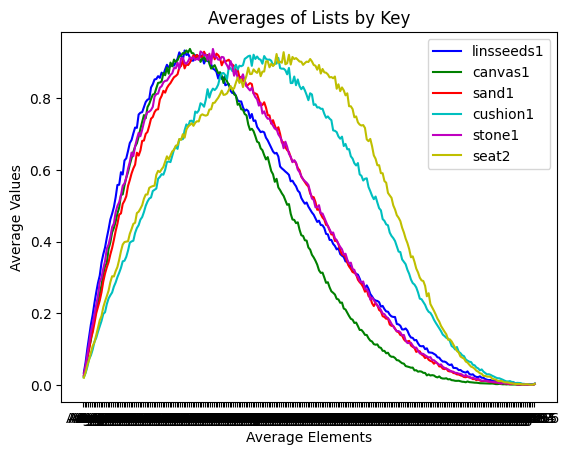

In [245]:
# List of unique colors for each key
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Get the keys and their corresponding averages
keys = list(averages_dictionary.keys())
averages = list(averages_dictionary.values())

# Set up the figure and axis
fig, ax = plt.subplots()

# Create bar plots for each key
# Create continuous line plot for each key
for i in range(len(keys)):
    ax.plot(np.arange(len(averages[i])) + 1, averages[i], label=keys[i], color=colors[i])

# Customize plot
ax.set_xlabel('Average Elements')
ax.set_ylabel('Average Values')
ax.set_title('Averages of Lists by Key')
ax.set_xticks(np.arange(len(averages[0])) + (len(keys) - 1) * 0.1)
ax.set_xticklabels(['Avg{}'.format(idx + 1) for idx in range(len(averages[0]))])

# Add legend
ax.legend()

# Show the plot
plt.show()

this is the histogram for level 2
this is better in some classes

In [246]:
pyramid_dict = image_loader.image_dict.copy()
hist_pyramid_dict = image_loader.image_dict.copy()

In [247]:
from skimage.filters import sobel

list_oflvl1_hists = []
for label in pyramid_dict.keys():
 list_of_label = []
 for img in pyramid_dict[label]:
    equalized = image_processor.img_histogram_equalization(img)
    smoothed = image_processor.img_gaussian_smoothing(equalized)
    pyramid = image_processor.img_pyramid(smoothed)
    listOfHists = []
    for i in pyramid:
      img_sobel = image_processor.img_sobel(i)
      hist = image_processor.img_histogram(img_sobel)
      listOfHists.append(hist)
    list_oflvl1_hists.append(listOfHists[2])
    list_of_label.append(listOfHists)
 hist_pyramid_dict[label] = list_of_label

In [248]:
len(list_oflvl1_hists[0])
dict_oflvl1_hists = {}
dict_oflvl1_hists['linsseeds1'] = list_oflvl1_hists[0:30]
dict_oflvl1_hists['canvas1'] = list_oflvl1_hists[30:60]
dict_oflvl1_hists['sand1'] = list_oflvl1_hists[60:90]
dict_oflvl1_hists['cushion1'] = list_oflvl1_hists[90:120]
dict_oflvl1_hists['stone1'] = list_oflvl1_hists[120:150]
dict_oflvl1_hists['seat2'] = list_oflvl1_hists[150:180]

In [249]:
averages_dictionary = {}

# Iterate through each key in the original dictionary
for key, lists in dict_oflvl1_hists.items():
    # Calculate the average for each list and store it in the averages list
    averages = [sum(item) / len(item) for item in zip(*lists)]

    # Store the averages for the key in the new dictionary
    averages_dictionary[key] = averages


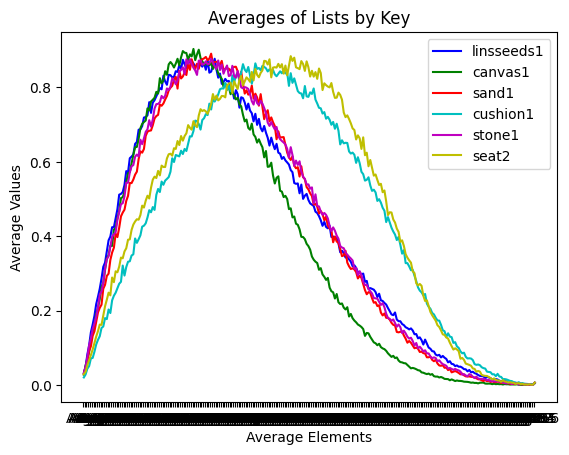

In [250]:
# List of unique colors for each key
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Get the keys and their corresponding averages
keys = list(averages_dictionary.keys())
averages = list(averages_dictionary.values())

# Set up the figure and axis
fig, ax = plt.subplots()

# Create bar plots for each key
# Create continuous line plot for each key
for i in range(len(keys)):
    ax.plot(np.arange(len(averages[i])) + 1, averages[i], label=keys[i], color=colors[i])

# Customize plot
ax.set_xlabel('Average Elements')
ax.set_ylabel('Average Values')
ax.set_title('Averages of Lists by Key')
ax.set_xticks(np.arange(len(averages[0])) + (len(keys) - 1) * 0.1)
ax.set_xticklabels(['Avg{}'.format(idx + 1) for idx in range(len(averages[0]))])

# Add legend
ax.legend()

# Show the plot
plt.show()

this is the histogram for level 3
this is better in some classes